# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

'''from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe()) '''

Paso 1: Carga del conjunto de datos


In [125]:
# Example importing the CSV here
import pandas as pd

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Paso 2: Realiza un EDA completo


In [126]:
# Obtener las dimensiones
dataframe.shape

(41188, 21)

In [127]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [128]:
#Eliminar duplicados
dataframe.duplicated().sum()


12

In [129]:
dataframe.drop_duplicates(inplace = True)

In [130]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

In [131]:
#Eliminar información irrelevante
dataframe.drop(["previous", "poutcome", "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"], axis = 1, inplace = True)
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,no


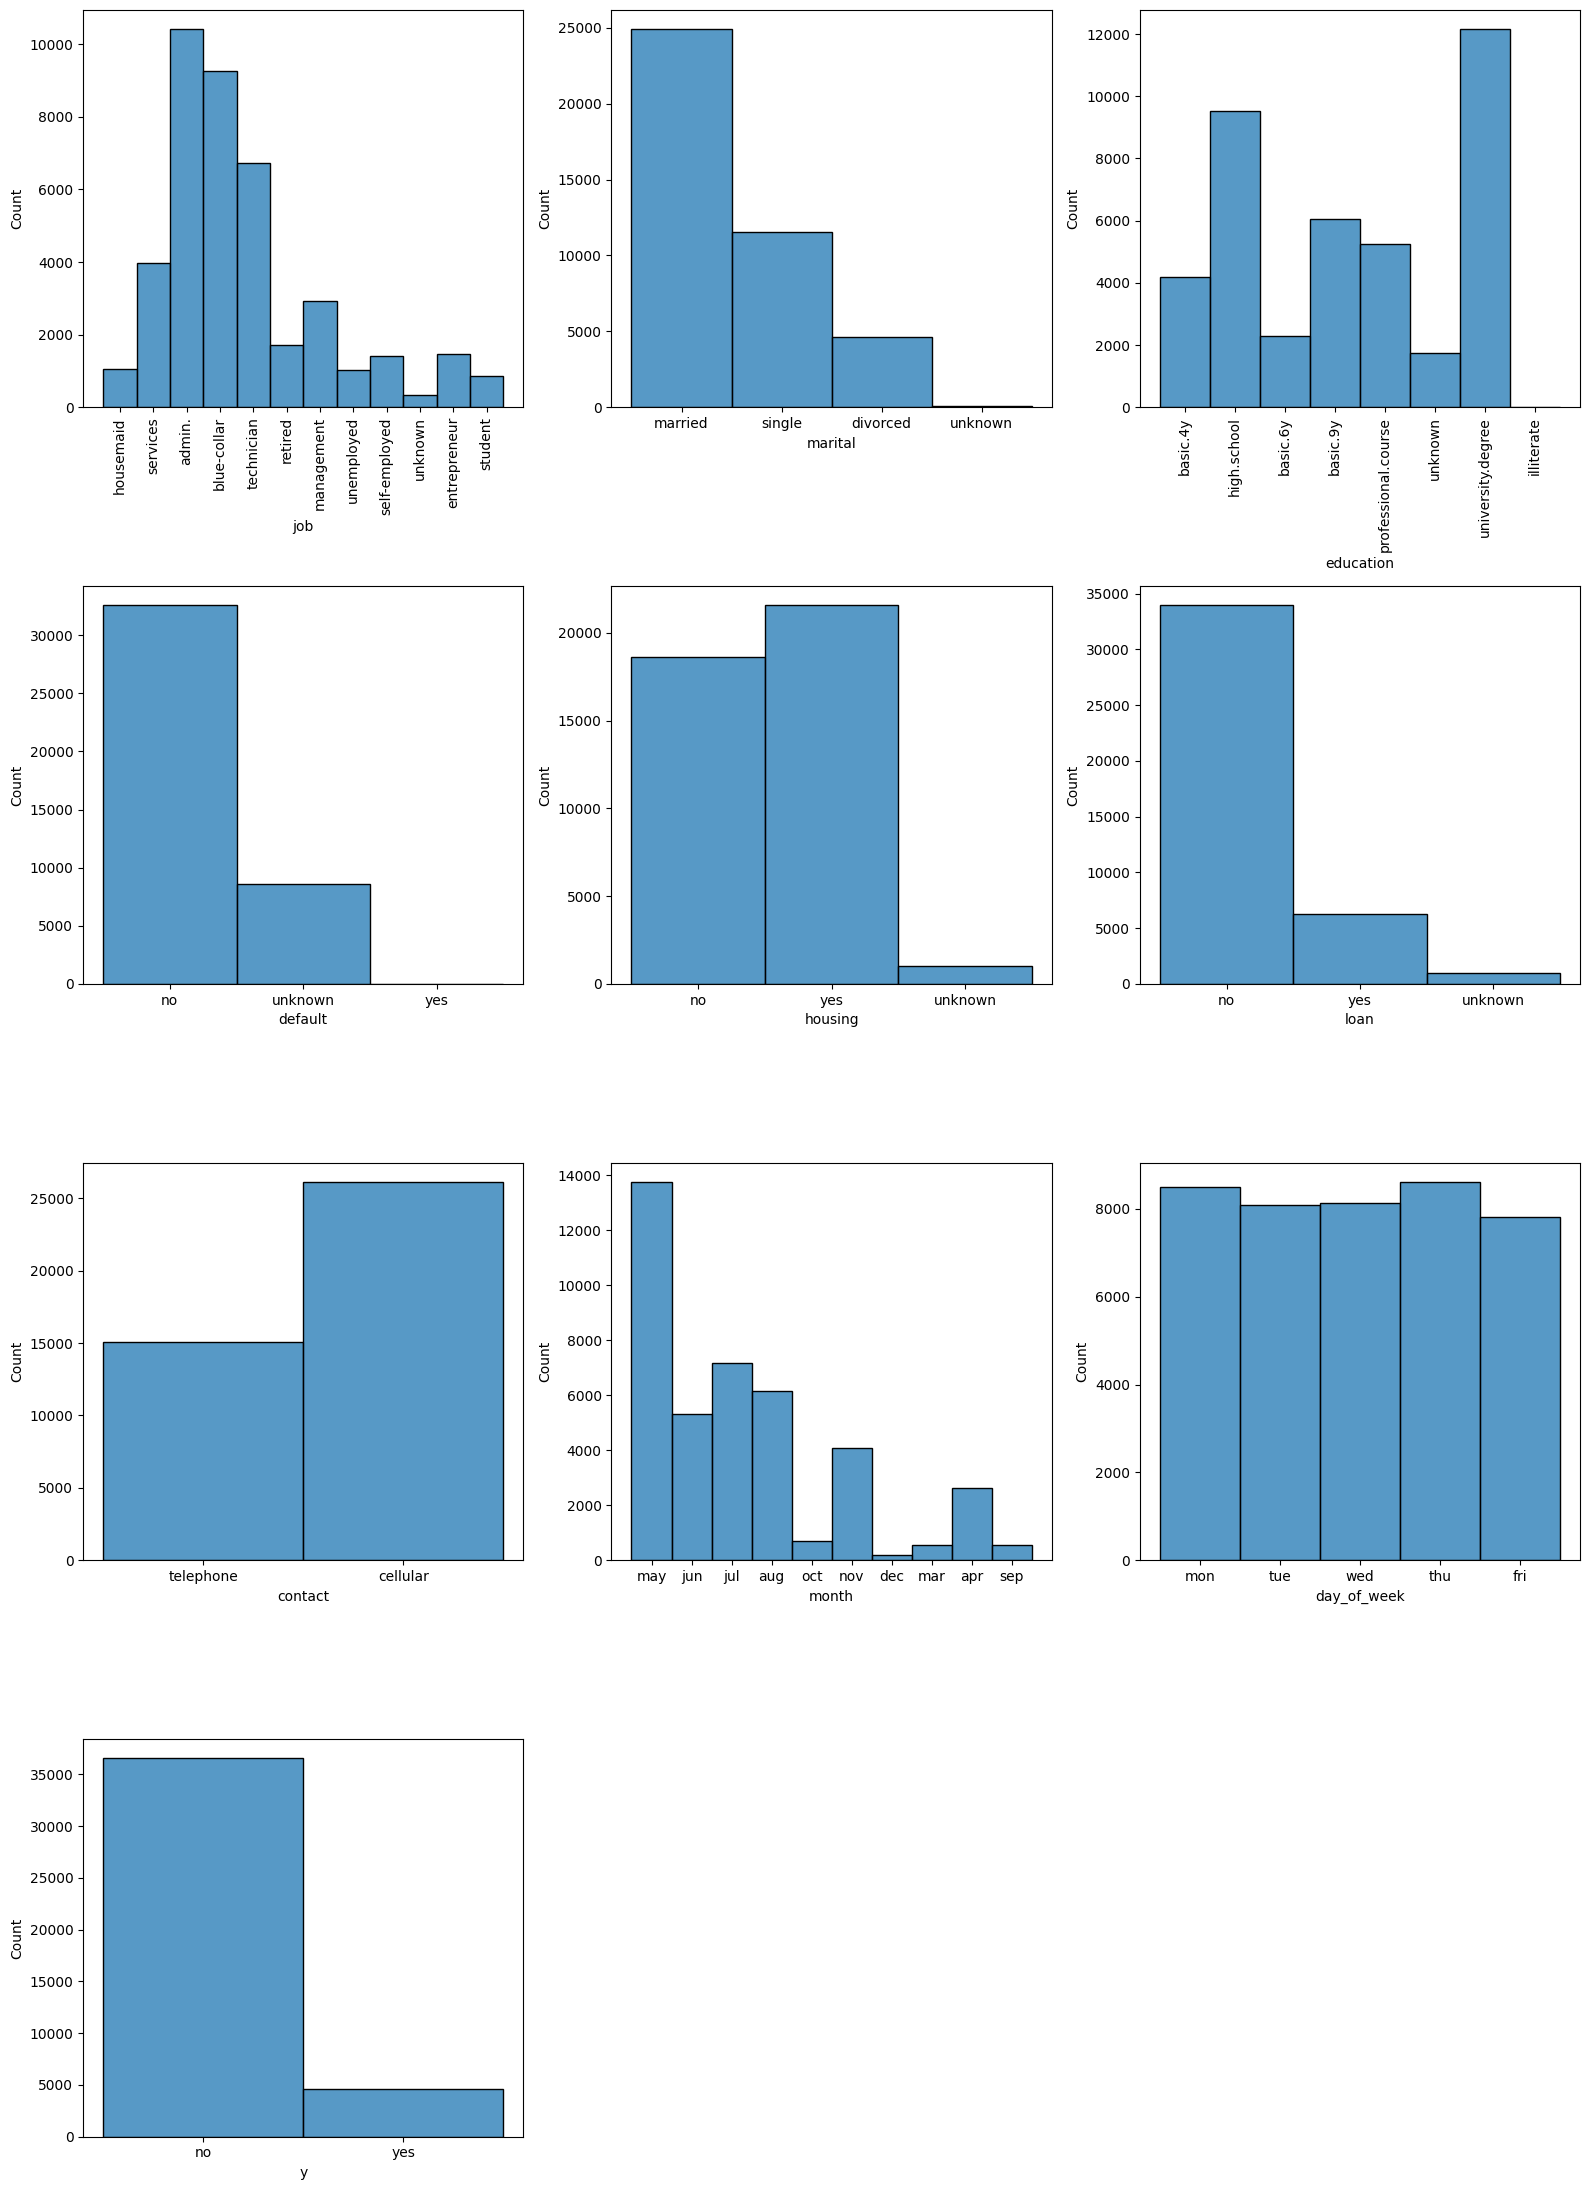

In [132]:
#Análisis sobre variables categóricas


import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(4, 3, figsize=(16, 22))

# Crear histograma
sns.histplot(ax=axes[0, 0], data=dataframe, x='job')
axes[0, 0].tick_params(axis='x', rotation=90)
sns.histplot(ax=axes[0, 1], data=dataframe, x='marital')
sns.histplot(ax=axes[0, 2], data=dataframe, x='education')
axes[0, 2].tick_params(axis='x', rotation=90)
sns.histplot(ax=axes[1, 0], data=dataframe, x='default')
sns.histplot(ax=axes[1, 1], data=dataframe, x='housing')
sns.histplot(ax=axes[1, 2], data=dataframe, x='loan')
sns.histplot(ax=axes[2, 0], data=dataframe, x='contact')
sns.histplot(ax=axes[2, 1], data=dataframe, x='month')
sns.histplot(ax=axes[2, 2], data=dataframe, x='day_of_week')
sns.histplot(ax=axes[3, 0], data=dataframe, x='y')

# Eliminar subplots vacío
fig.delaxes(axes[3, 1])
fig.delaxes(axes[3, 2])

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

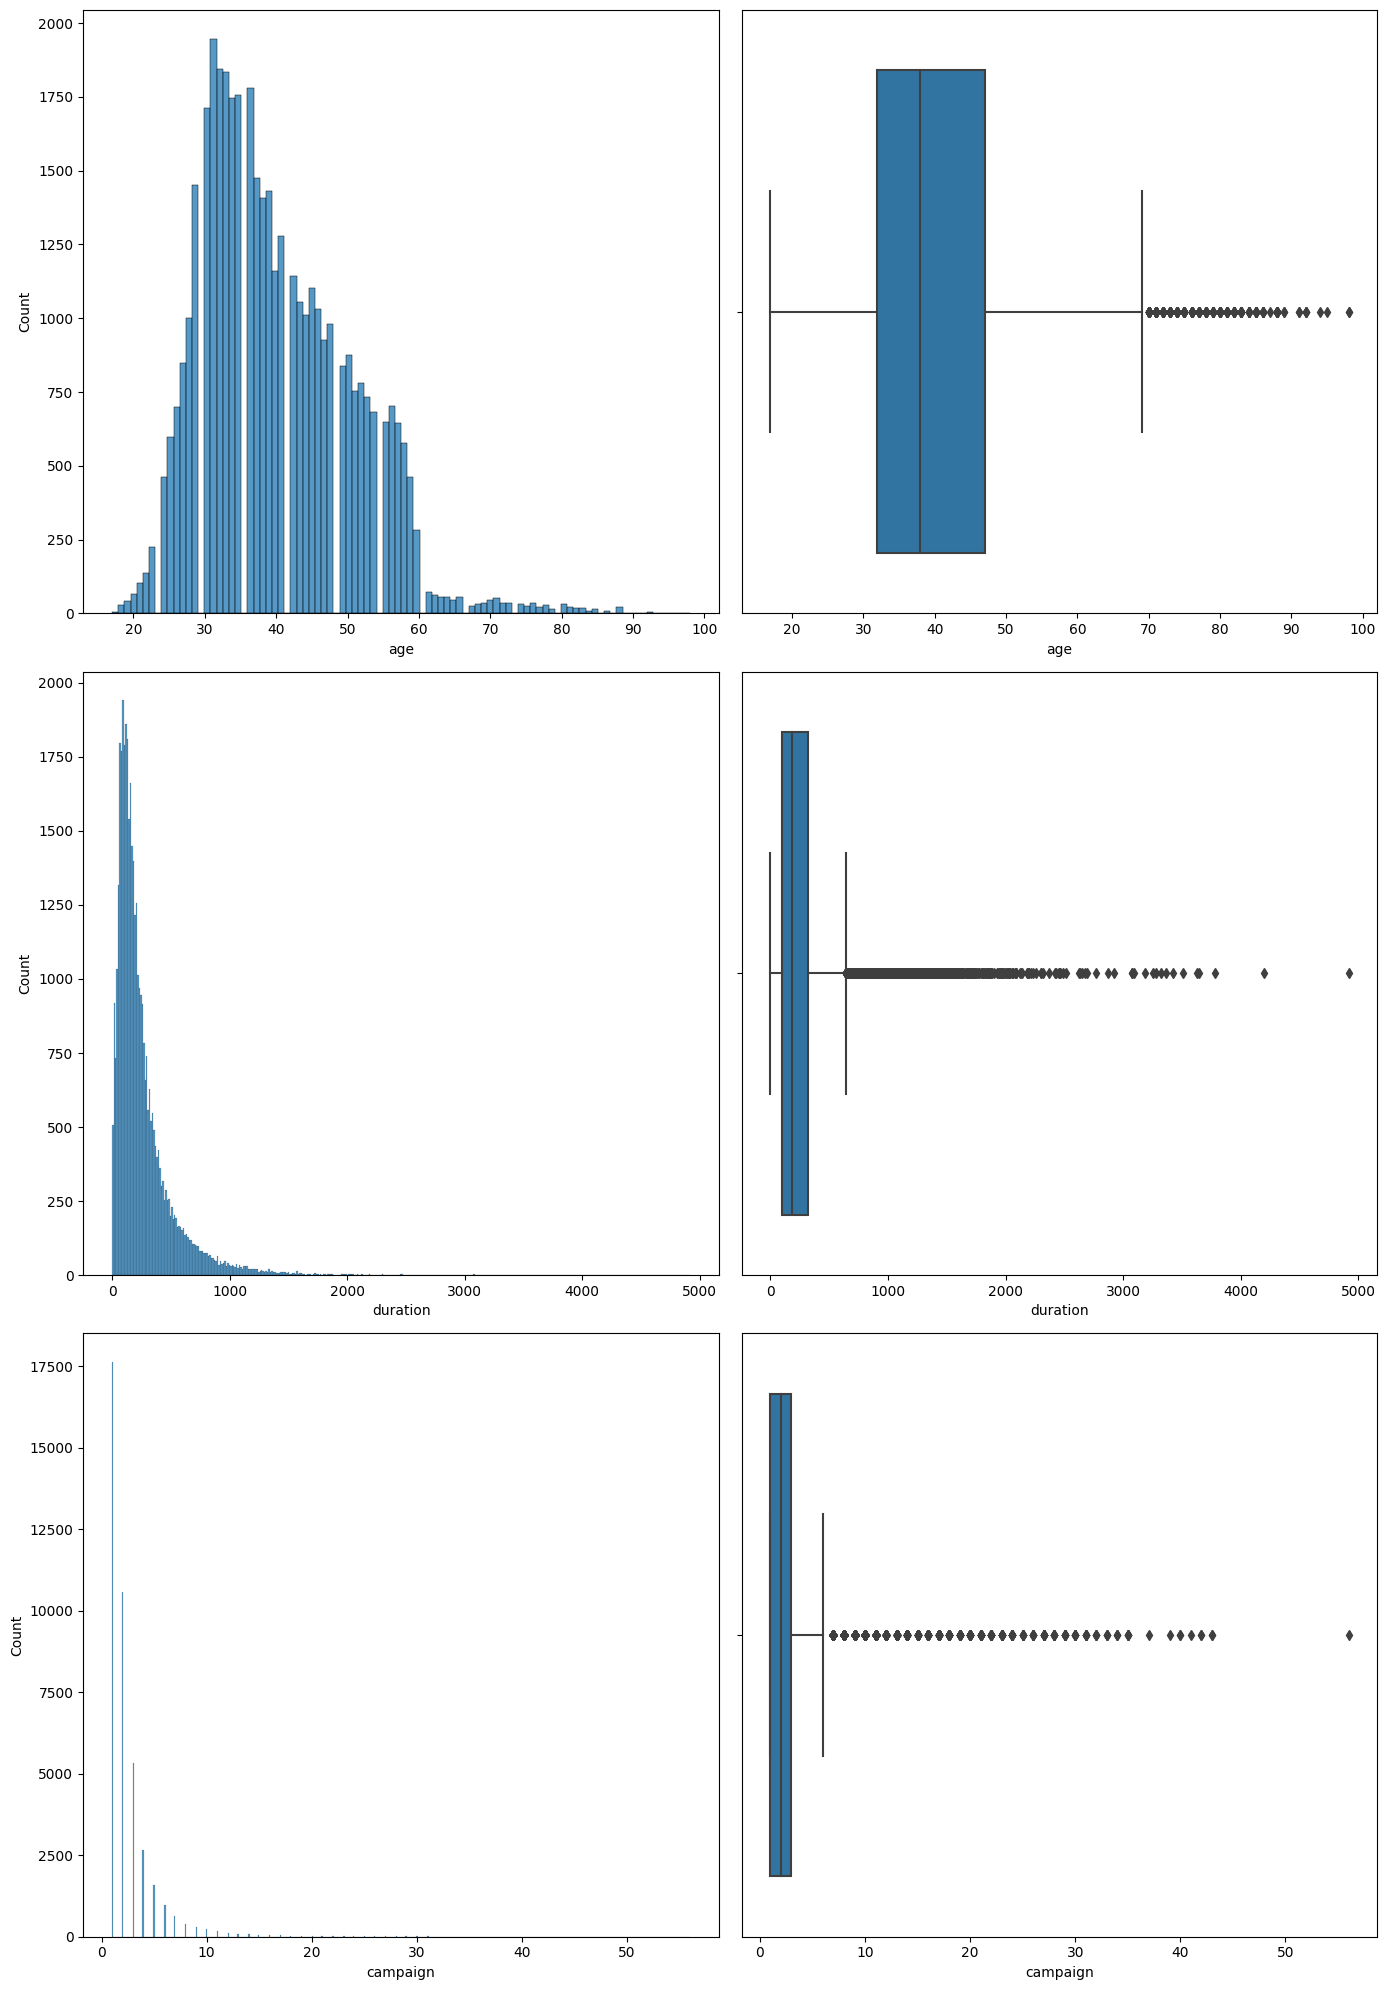

In [133]:
#Análisis sobre variables numericas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 10 filas y 2 columnas
fig, axis = plt.subplots(3, 2, figsize=(14, 20))

# Gráficos de las variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="age")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="age")
sns.histplot(ax=axis[1, 0], data=dataframe, x="duration")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="duration")
sns.histplot(ax=axis[2, 0], data=dataframe, x="campaign")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="campaign")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

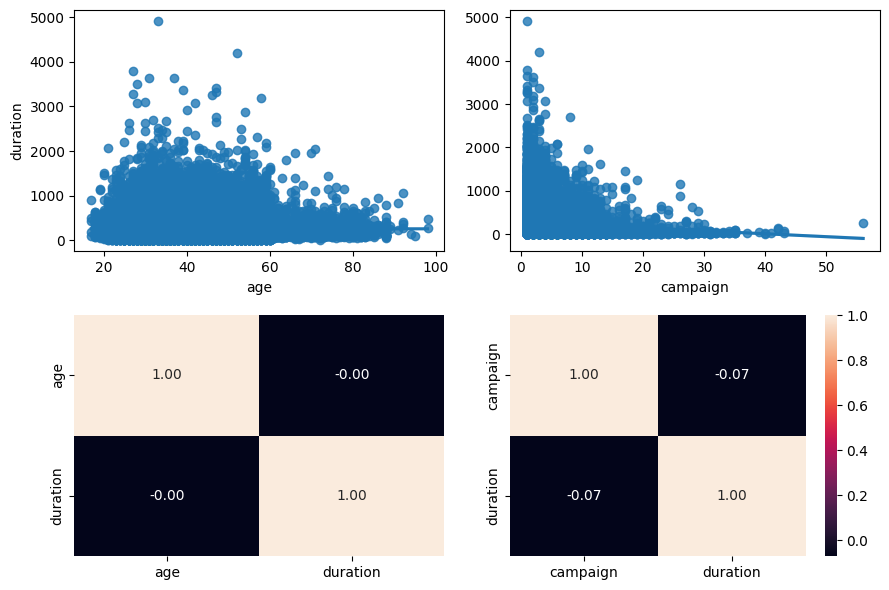

In [134]:
#Análisis numérico-numérico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(9, 6))

# Gráfico de dispersión y correlación entre "age" y "duration"
sns.regplot(ax=axis[0, 0], data=dataframe, x="age", y="duration")
sns.heatmap(dataframe[["age", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Gráfico de dispersión y correlación entre "campaign" y "duration"
sns.regplot(ax=axis[0, 1], data=dataframe, x="campaign", y="duration").set(ylabel=None)
sns.heatmap(dataframe[["campaign", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

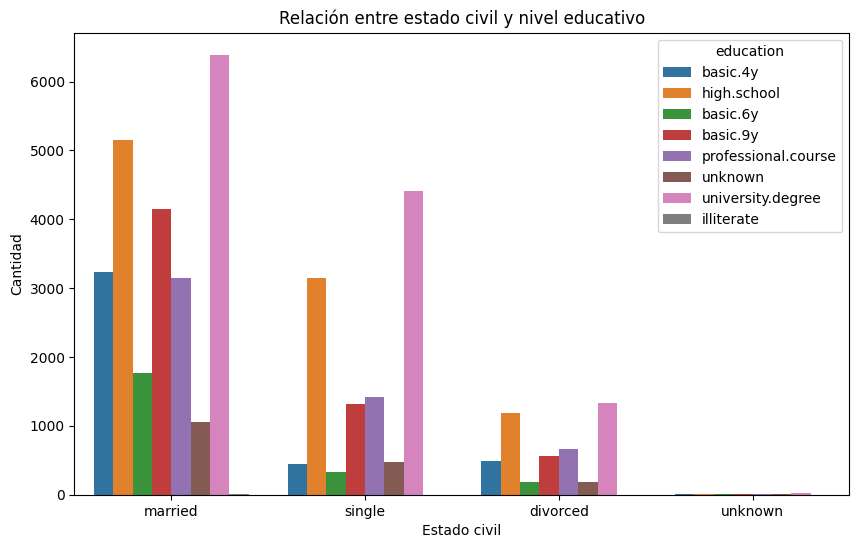

In [135]:
#Análisis categórico-categórico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de contingencia entre las variables categóricas
contingency_table = pd.crosstab(dataframe['marital'], dataframe['education'])

# Crear gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='marital', hue='education')

# Establecer título y etiquetas de los ejes
plt.title("Relación entre estado civil y nivel educativo")
plt.xlabel("Estado civil")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

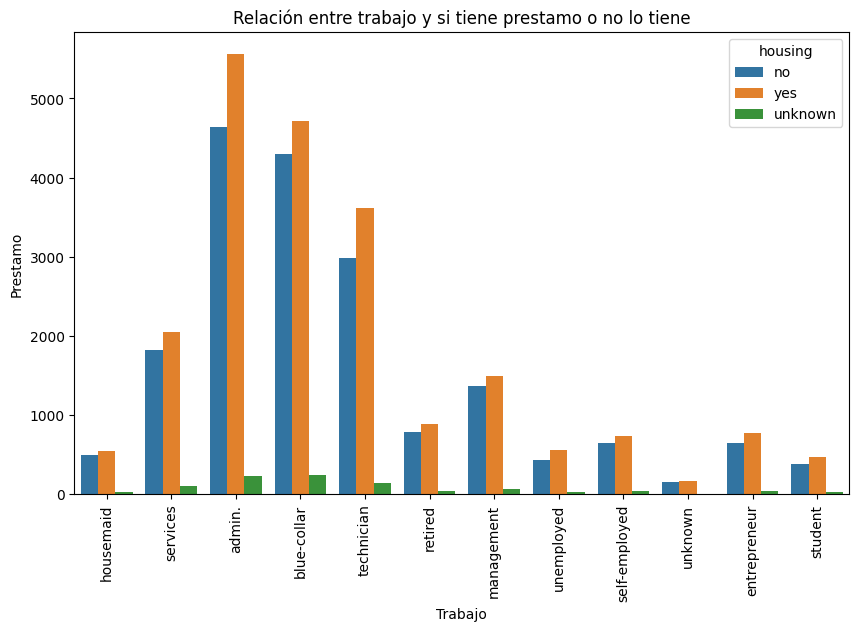

In [136]:
import matplotlib.pyplot as plt  
import seaborn as sns

# Crear una tabla de contingencia entre las variables categóricas
contingency_table = pd.crosstab(dataframe['job'], dataframe['housing'])

# Crear gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='job', hue='housing')

# Establecer título y etiquetas de los ejes
plt.title("Relación entre trabajo y si tiene prestamo o no lo tiene")
plt.xlabel("Trabajo")
plt.ylabel("Prestamo")

# Girar las etiquetas del eje x
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

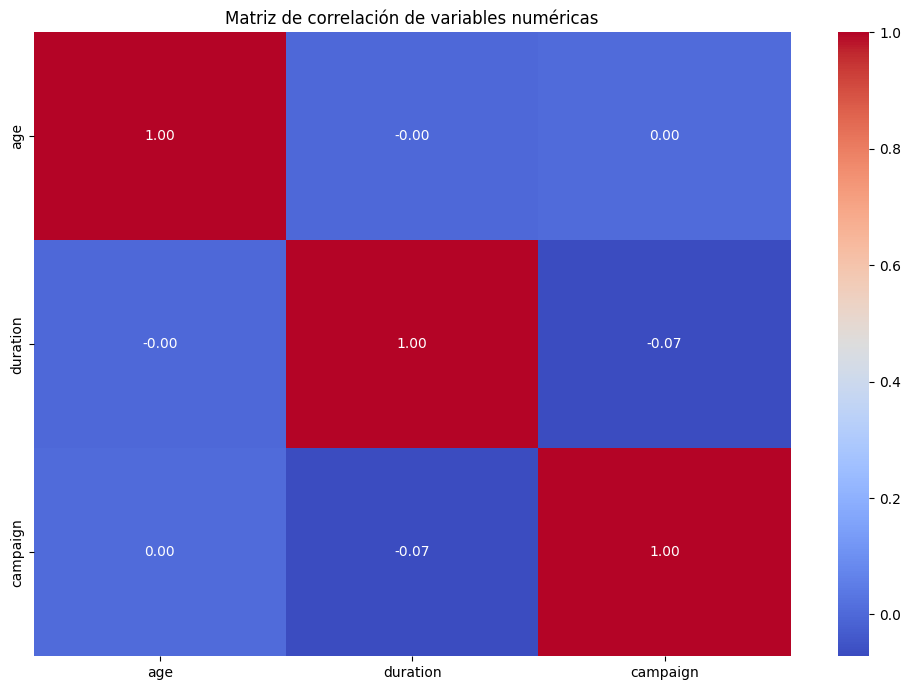

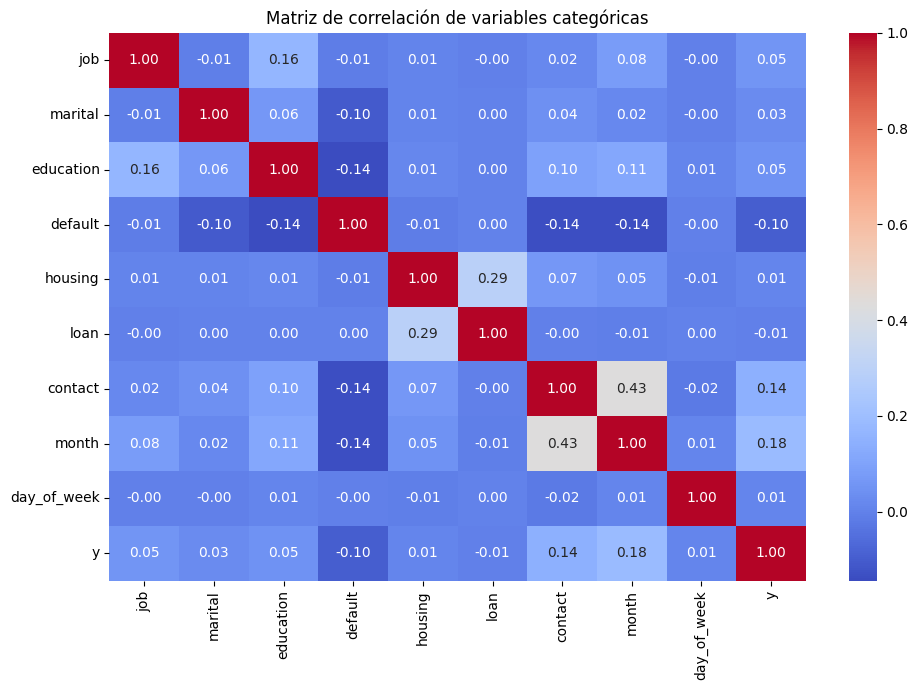

In [137]:
#Análisis numérico-categórico (completo y OPCIONAL)


import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas y categóricas para el análisis
numeric_columns = ["age", "duration", "campaign"]
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "y"]

# Calcular la matriz de correlación entre las variables numéricas
corr_matrix_numeric = dataframe[numeric_columns].corr()

# Crear el mapa de calor de correlación para variables numéricas
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_numeric, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

# Calcular la matriz de correlación entre las variables categóricas
corr_matrix_categorical = dataframe[categorical_columns].apply(lambda x: pd.factorize(x)[0]).corr()

# Crear el mapa de calor de correlación para variables categóricas
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_categorical, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables categóricas")
plt.tight_layout()
plt.show()

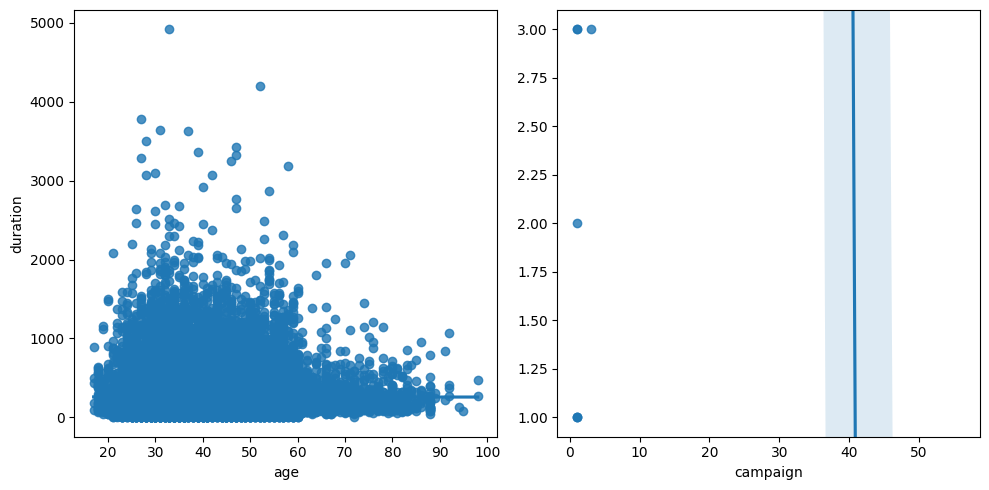

In [138]:
#Analizamos las variables vistas numericas

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = dataframe, x = "age", y = "duration")
sns.regplot(ax = axis[1], data = dataframe, x = "campaign", y = "duration").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

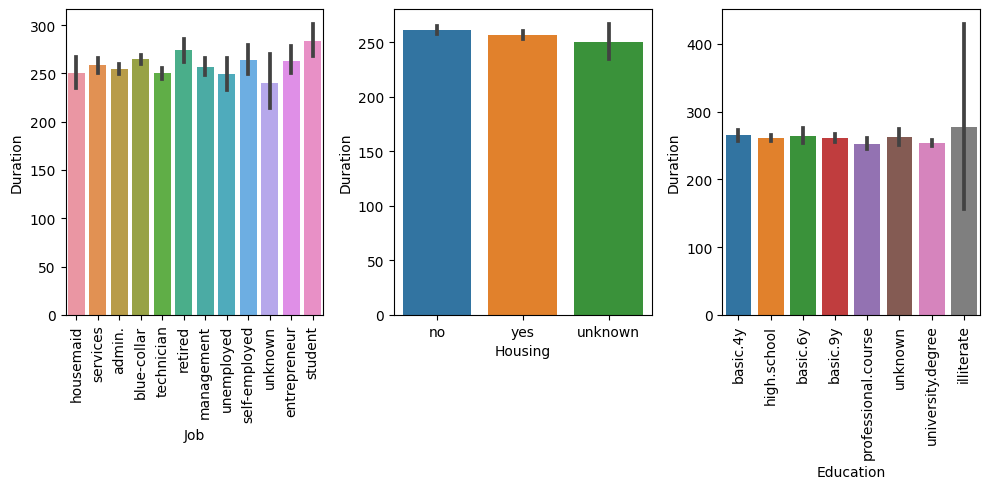

In [139]:
#Analizamos las variables vistas categoricas

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(10, 5), ncols=3)

sns.barplot(ax=axes[0], data=dataframe, x="job", y="duration")
axes[0].set_xlabel("Job")
axes[0].set_ylabel("Duration")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.barplot(ax=axes[1], data=dataframe, x="housing", y="duration")
axes[1].set_xlabel("Housing")
axes[1].set_ylabel("Duration")

sns.barplot(ax=axes[2], data=dataframe, x="education", y="duration")
axes[2].set_xlabel("Education")
axes[2].set_ylabel("Duration")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

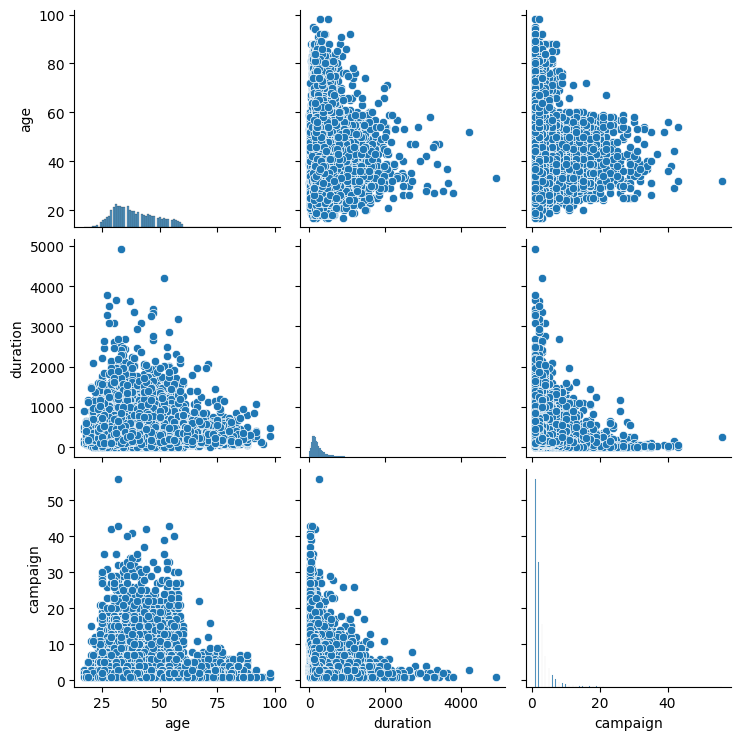

In [140]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

In [141]:
#análisis descriptivo para outliers

dataframe.describe()

,age,duration,campaign
count,41176.00000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879
std,10.42068,259.305321,2.770318
min,17.00000,0.000000,1.000000
25%,32.00000,102.000000,1.000000
50%,38.00000,180.000000,2.000000
75%,47.00000,319.000000,3.000000
max,98.00000,4918.000000,56.000000


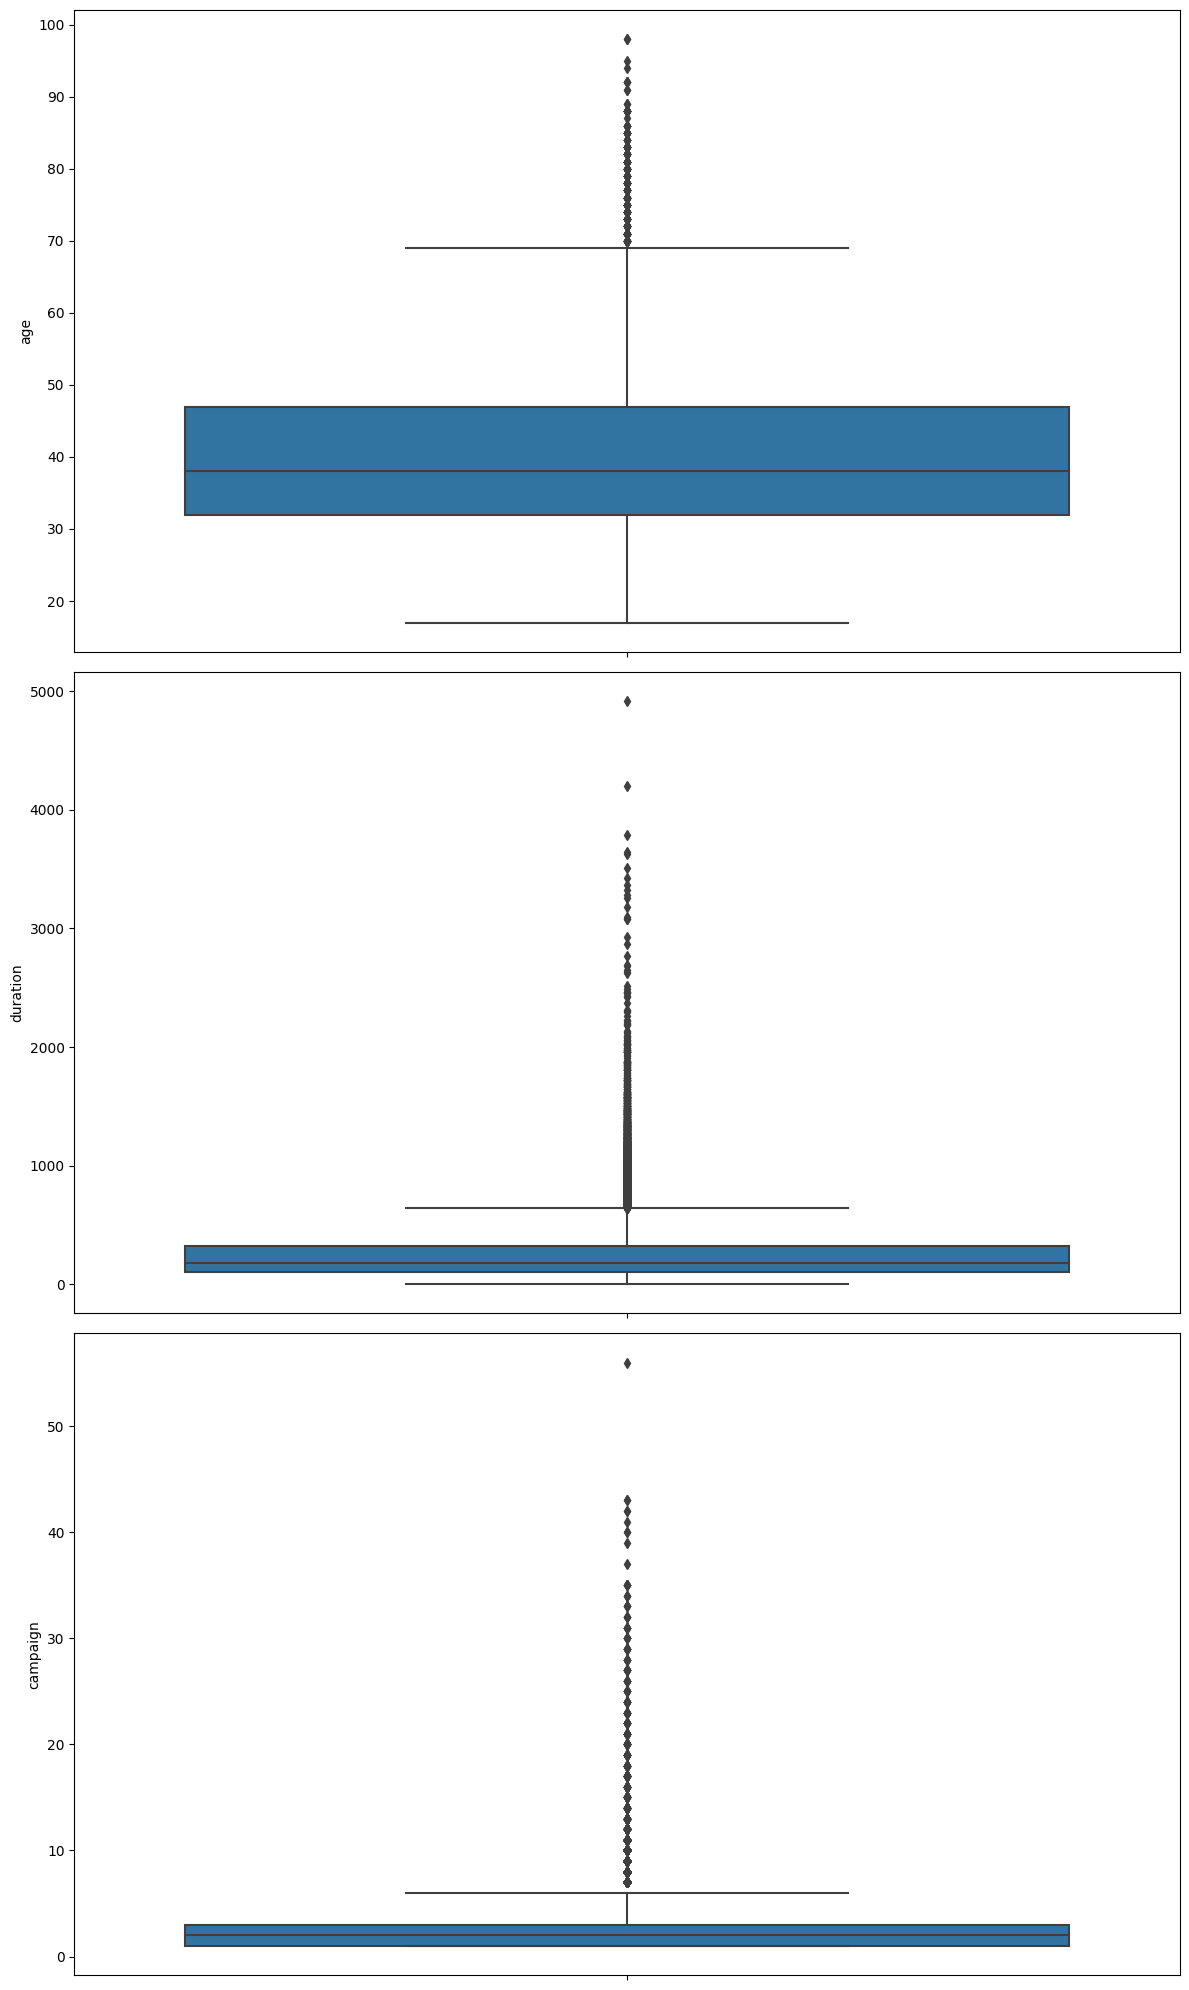

In [142]:
#Dibujar los diagramas de cajas de las variables

fig, axes = plt.subplots(3, 1, figsize=(12, 20))

sns.boxplot(ax=axes[0], data=dataframe, y="age")
sns.boxplot(ax=axes[1], data=dataframe, y="duration")
sns.boxplot(ax=axes[2], data=dataframe, y="campaign")

plt.tight_layout()
plt.show()

In [143]:
#eliminar outliers age

age_stats = dataframe["age"].describe()
print(age_stats)


fare_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * fare_iqr
lower_limit = age_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en age son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en age son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [144]:
#veamos cuántos valores representan ese valor extremo de X
dataframe[dataframe["age"] > 70]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,167,9,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,179,1,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,48,1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,266,2,yes
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,796,5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,138,4,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,621,1,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,411,1,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,yes


In [145]:
#eliminar outliers duration

duration_stats = dataframe["duration"].describe()
print(duration_stats)


fare_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * fare_iqr
lower_limit = duration_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en duration son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en duration son 644.5 y -223.5, con un rango intercuartílico de 217.0


In [146]:
#veamos cuántos valores representan ese valor extremo de X
dataframe[dataframe["duration"] > 2500]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
2313,39,self-employed,married,basic.4y,unknown,yes,no,telephone,may,tue,3366,3,no
3774,35,student,single,high.school,no,no,yes,telephone,may,fri,2680,1,yes
4213,42,management,married,basic.6y,unknown,yes,no,telephone,may,mon,3078,4,no
6280,30,self-employed,married,basic.9y,no,no,no,telephone,may,tue,3094,2,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,3631,2,yes
9276,47,admin.,divorced,university.degree,no,yes,no,telephone,jun,fri,2653,3,yes
10456,47,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,2769,4,yes
10707,30,self-employed,single,university.degree,no,yes,no,telephone,jun,tue,2621,3,yes
11360,26,technician,single,university.degree,no,no,no,telephone,jun,thu,2635,3,no
12029,58,retired,married,high.school,no,yes,no,telephone,jun,thu,3183,2,yes


In [147]:
#eliminar outliers campaign

campaign_stats = dataframe["campaign"].describe()
print(campaign_stats)


fare_iqr = campaign_stats["75%"] - campaign_stats["25%"]
upper_limit = campaign_stats["75%"] + 1.5 * fare_iqr
lower_limit = campaign_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en campaign son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en campaign son 6.0 y -2.0, con un rango intercuartílico de 2.0


In [148]:
#veamos cuántos valores representan ese valor extremo de X
dataframe[dataframe["campaign"] > 38]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,261,56,no
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,44,39,no
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,124,42,no
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,147,42,no
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,25,41,no
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,13,40,no
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,16,43,no
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,65,43,no
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,18,40,no


In [149]:
#Análisis de valores faltantes

dataframe.isnull().sum()


age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
y              0
dtype: int64

In [150]:
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,no


In [151]:
#escalado de valores (feature scaling)


#Normalización

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_variables = ["age", "duration", "campaign"]


norm_features = scaler.fit_transform(dataframe[num_variables])

dataframe_norm = pd.DataFrame(norm_features, index = dataframe.index, columns = num_variables)
dataframe_norm.head()




,age,duration,campaign
0,1.533143,0.010352,-0.565963
1,1.629107,-0.421577,-0.565963
2,-0.290177,-0.124626,-0.565963
3,-0.002284,-0.413864,-0.565963
4,1.533143,0.187751,-0.565963


In [152]:
#Escalado Mínimo-Máximo

from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "duration", "campaign"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe[num_variables])
dataframe_scal = pd.DataFrame(scal_features, index = dataframe.index, columns = num_variables)
dataframe_scal.head()

,age,duration,campaign
0,0.481481,0.053070,0.0
1,0.493827,0.030297,0.0
2,0.246914,0.045954,0.0
3,0.283951,0.030704,0.0
4,0.481481,0.062424,0.0


In [153]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = dataframe_scal.drop("age", axis=1)
y = dataframe_scal["age"]

# Convertir las etiquetas continuas en etiquetas discretas
y_discrete = pd.cut(y, bins=3, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)
selection_model = SelectKBest(chi2, k=2)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

# Ajustar el LabelEncoder en las etiquetas discretas
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Convertir las etiquetas discretas de vuelta a continuas
y_train_continuous = label_encoder.inverse_transform(y_train)
y_test_continuous = label_encoder.inverse_transform(y_test)

X_train_sel["age"] = y_train_continuous
X_test_sel["age"] = y_test_continuous

train_file_path = r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\014-PROYECTO1-Regresion-Logistica-main\src\clean_train.csv"
test_file_path = r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\014-PROYECTO1-Regresion-Logistica-main\src\clean_test.csv"

X_train_sel.to_csv(train_file_path, index=False)
X_test_sel.to_csv(test_file_path, index=False)

Paso 3: Construye un modelo de regresión logística